In [1]:
include("../src/Utils.jl")

cluster_indicator (generic function with 2 methods)

In [2]:
using Plots
using StatsPlots

In [3]:
fs = rand([x -> cos(2π*x), x-> sin(2π*x)], 10)

10-element Vector{Function}:
 #52 (generic function with 1 method)
 #52 (generic function with 1 method)
 #52 (generic function with 1 method)
 #51 (generic function with 1 method)
 #52 (generic function with 1 method)
 #51 (generic function with 1 method)
 #52 (generic function with 1 method)
 #52 (generic function with 1 method)
 #51 (generic function with 1 method)
 #52 (generic function with 1 method)

In [4]:
using Distributions

In [5]:
#X = hcat([f.(rand(1_000)) for f in fs]...)
n = 1_000
t = rand(Uniform(0,2π),n)
X = hcat([10*cos.(t), 10*sin.(t)]..., randn(n, 500))

1000×502 Matrix{Float64}:
 -7.73779   -6.33455   -0.589723   …   0.949208    0.781674    0.19496
 -8.60738    5.09048    0.650175      -1.39023     0.383002    0.580306
 -4.60368    8.87728   -0.539444       0.189747   -0.0378033  -0.235684
 -4.77829    8.78453    0.0715124      1.53531    -0.418995   -1.26403
  9.86867    1.61537    0.566754       1.20691     1.61843    -0.6657
 -1.9178     9.81438   -0.546266   …   0.428591    1.20281     0.384719
  9.98775   -0.494807  -0.0909538      0.163496    1.74335     0.405097
 -4.84719    8.7467    -0.929787      -0.332353    2.10411    -0.653099
 -0.112794  -9.99936    0.165951       0.343906    0.456372    0.53177
 -8.79352    4.76173    0.635457       0.543743   -0.545418   -0.231422
 -8.29814    5.5804    -0.950289   …   1.02492    -0.808359    0.53374
  8.88457   -4.5896     0.947302       2.21795    -0.202136   -0.733066
 -6.65301   -7.46575    2.20393        0.180751    0.0657784   1.37296
  ⋮                                ⋱         

In [6]:
pcs = getPCs(collect(X'))

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,5.66374,7.74628,-0.466607,-2.40473,-2.02675,-1.46317,-0.955555
2,9.24019,-2.97551,0.528058,-0.165257,1.98551,-0.843205,2.74769
3,5.84835,-7.96184,0.260135,-1.85727,0.00508234,0.947788,0.993725
4,6.23051,-7.78694,1.97368,-0.200261,1.41548,1.62206,1.45693
5,-9.72084,-3.73899,0.853124,-3.25379,1.77964,-0.0396316,1.61072
6,3.42237,-9.11809,2.8267,-0.248406,-0.710459,-4.284,-0.754425
7,-10.3333,-1.72301,-0.0919369,-1.9661,1.70819,-1.40649,2.72017
8,6.09966,-7.56095,-0.402606,0.667448,-2.04133,3.10407,2.50645
9,-2.47977,9.75483,3.80248,1.20858,-0.366837,0.517824,-2.00771


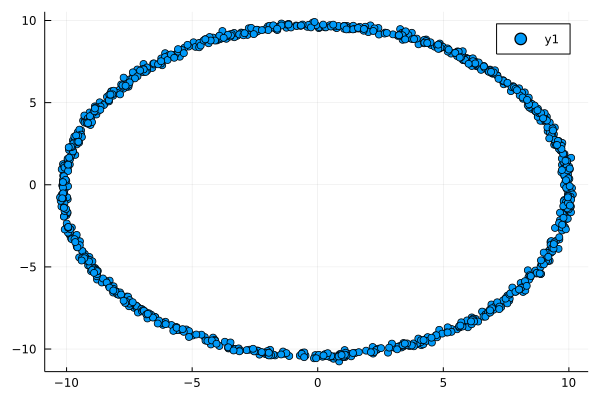

In [49]:
@df pcs scatter(:PC_1, :PC_2)

In [9]:
using UMAP

In [13]:
Y = umap(collect(X'))

2×1000 Matrix{Float64}:
  0.0631585  -0.923496  -0.502838  …  -1.4928     2.68926  -0.46099
 -2.44065     0.623161   1.72655      -0.205453  -3.10516  -1.46796

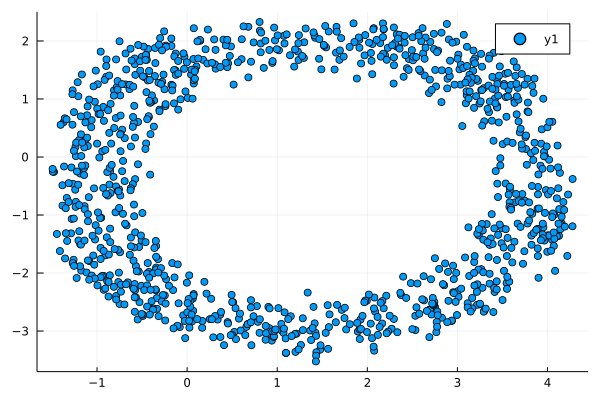

In [14]:
scatter(Y[1,:], Y[2,:])

In [15]:
function slingshot_ordering(X, cluster_labels)
    R"library(slingshot)"
    R"sds <- slingshot($(collect(X')), $(cluster_labels))"
    R"ts <- slingPseudotime(sds)"
    @rget ts
    # sling_order = sortperm(vec(ts))
    return vec(ts)
end

slingshot_ordering (generic function with 2 methods)

In [16]:
using RCall

In [18]:
slingshot_ordering(Y, rand([1,2,3], size(Y,2)))

1000-element Vector{Float64}:
  8.637166015936474
  5.296808640301244
  4.351885938171317
  4.879096739808977
 14.17182499241081
  3.697451638718467
 14.112824517858373
  4.7183885395438745
 10.52747908052421
  5.7641096710070885
  5.353287338730676
 13.2972782311266
  8.633320463201363
  ⋮
  9.636281247788544
  4.943829511221601
 12.636374185732071
  5.088245788991799
  2.4323943967535406
  0.10458049977536432
  6.188423207370338
  6.82036228501096
  5.3302962693658245
  6.124080098929982
 11.047197639437535
  7.484525607366847